In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import fit


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

We read in the data from SLG and DLG files and fit to a single exponential.

I have tried fitting to the Gaussian function, but the fit is not that great in that case.

Also, one can play with the range of data that can be used for fitting. In particular, the last two parameters in the *get_data_file* function (here, I used one of the most general signature of it) are set to 0.0 and 1500. Our data contains only 1000 points, so all of them are included. but if we'd reduce the last parameter to say 400, we'd use different set of points in the fitting procedure. 

The fitting parameters A and B are printed out as the fitting results and we also get arrays Pfit1 and Pfit2 that can be used later to visualized the quality of the fit.

In [2]:
verb = 0
opt = 0

T1, P1 = fit.get_data_from_file("SLG.txt", 0, 1, 0.0, 1500.0)
Pfit1, A1, B1 = fit.fit_exp(T1, P1, 0.0, verb, opt)  
#Pfit1, A1, B1 = fit.fit_gau(T1, P1, 0.0)  
print "SLG data gives: A = ", A1, " and B = ", B1, " 1/B = ", 1/B1

T2, P2 = fit.get_data_from_file("DLG.txt", 0, 1, 0.0, 1500.0)
Pfit2, A2, B2 = fit.fit_exp(T2, P2, 0.0, verb, opt)  
#Pfit2, A2, B2 = fit.fit_gau(T2, P2, 0.0)  
print "DLG data gives: A = ", A2, " and B = ", B2, " 1/B = ", 1/B2

SLG data gives: A =  1.0  and B =  0.00394164693667  1/B =  253.701058483
DLG data gives: A =  1.0  and B =  0.00167224605241  1/B =  597.99812268


Now, just do the data plots as well as the fitting lines

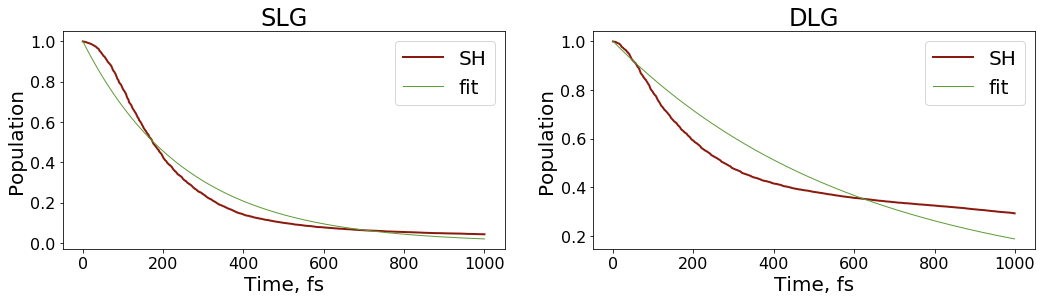

In [3]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('SLG')
plt.xlabel('Time, fs')
plt.ylabel('Population')
plt.plot(T1, P1, label='SH', linewidth=2, color = colors["11"]) 
plt.plot(T1, Pfit1, label='fit', linewidth=1, color = colors["21"]) 
plt.legend()

plt.subplot(1,2,2)
plt.title('DLG')
plt.xlabel('Time, fs')
plt.ylabel('Population')
plt.plot(T2, P2, label='SH', linewidth=2, color = colors["11"]) 
plt.plot(T2, Pfit2, label='fit', linewidth=1, color = colors["21"]) 
plt.legend()

plt.show()
plt.close()